# 3DMM-fitting

## Repro [Github](https://github.com/Yinghao-Li/3DMM-fitting)

In [1]:
!git clone https://github.com/Yinghao-Li/3DMM-fitting
%cd 3DMM-fitting

Cloning into '3DMM-fitting'...
remote: Enumerating objects: 414, done.
remote: Total 414 (delta 0), reused 0 (delta 0), pack-reused 414
Receiving objects: 100% (414/414), 81.76 MiB | 35.92 MiB/s, done.
Resolving deltas: 100% (101/101), done.
/kaggle/working/3DMM-fitting


In [2]:
!pip install -q menpo menpofit menpodetect menpowidgets

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

qgrid 1.3.1 requires ipywidgets>=7.0.0, but you'll have ipywidgets 6.0.1 which is incompatible.
pandas-profiling 2.6.0 requires ipywidgets>=7.5.1, but you'll have ipywidgets 6.0.1 which is incompatible.
jupyter-console 6.1.0 requires prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.18 which is incompatible.
cufflinks 0.17.3 requires ipywidgets>=7.0.0, but you'll have ipywidgets 6.0.1 which is incompatible.
conx 3.7.10 requires ipywidgets>=7.0, but you'll have ipywidgets 6.0.1 which is incompatible.
bqplot 0.12.17 requires ipywidgets>=7.5.0, but you'll have ipywidgets 6.0.1 which is incompatible.
menpowidgets 0.3.0 requires menpo<0.9,>=0.8, but you'll have menpo 0.1

### copy face files to local data directory

In [3]:
!cp ../../input/input-faces/Trump_frontal_face.jpg ./data
!cp ../../input/input-faces/Trump_profile_face.jpg ./data

## From Face to Face Landmarks

In [6]:
import sys
import os
import numpy as np
import cv2
import dlib

from PIL import Image
from IPython.display import display

In [7]:
def save_pts(pts: np.ndarray, filename: str) -> None:
    f = open(filename + '.pts', 'w')
    f.write('version: 1\n')
    f.write('n_points: {}\n'.format(len(pts)))
    f.write('{\n')
    for pt in pts:
        f.write('{0:.3f} {1:.3f}\n'.format(pt[0], pt[1]))
    f.write('}\n')
    f.close()
    return None

### Face Detector (frontal)

In [8]:
data_path = './data/'

In [9]:
filename = 'Trump_frontal_face'

In [10]:
img = cv2.imread(data_path+filename+'.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [11]:
detector = dlib.get_frontal_face_detector()

faces = detector(gray)

for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    # Draw a rectangle (bounding box)
    #cv2.rectangle(img, pt1=(x1,y1), pt2=(x2,y2), color=(0,255,0), thickness=4) 

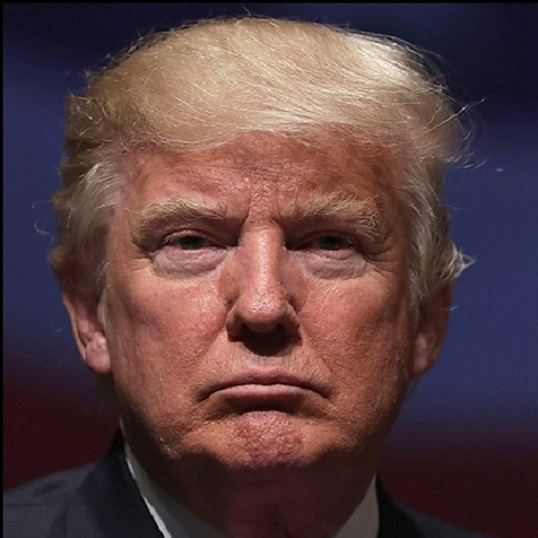

In [12]:
pic=Image.fromarray(img, 'RGB')
display(pic)

### Face Landmarks (frontal)

In [13]:
# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("../../input/shape-predictor-68-face-landmarks/shape_predictor_68_face_landmarks.dat")

In [24]:
face = faces[0]
x1 = face.left() # left point
y1 = face.top() # top point
x2 = face.right() # right point
y2 = face.bottom() # bottom point

# Look for the landmarks (68 points)
landmarks = predictor(image=gray, box=face)

pts = []
for i in range(68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y

    # Draw a circle
    cv2.circle(img=img, center=(x, y), radius=1, color=(0, 255, 0), thickness=-1)
    pts.append([x, y])
pts=np.array(pts)
print(pts)

[[102 261]
 [106 300]
 [111 339]
 [119 377]
 [134 409]
 [158 437]
 [191 456]
 [230 469]
 [273 470]
 [314 464]
 [349 449]
 [379 427]
 [397 398]
 [405 365]
 [409 330]
 [412 294]
 [414 258]
 [130 233]
 [152 214]
 [183 206]
 [215 208]
 [244 219]
 [277 218]
 [307 209]
 [339 207]
 [369 215]
 [389 235]
 [263 235]
 [264 260]
 [264 285]
 [265 311]
 [234 335]
 [249 338]
 [264 341]
 [279 338]
 [292 336]
 [165 244]
 [183 236]
 [201 237]
 [218 247]
 [201 249]
 [182 249]
 [305 248]
 [323 238]
 [341 239]
 [357 247]
 [342 251]
 [324 251]
 [207 394]
 [229 380]
 [249 372]
 [264 375]
 [280 372]
 [301 380]
 [323 392]
 [302 398]
 [282 399]
 [266 399]
 [250 400]
 [230 399]
 [215 392]
 [249 383]
 [264 384]
 [280 382]
 [314 390]
 [282 383]
 [265 385]
 [250 384]]


In [25]:
save_pts(pts, data_path+filename)

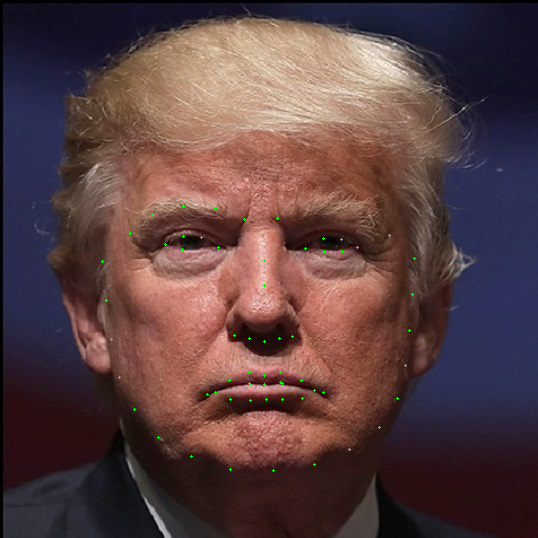

In [26]:
pic=Image.fromarray(img, 'RGB')
display(pic)

### Face Detector (profile)

In [ ]:
from assist import manual_marker

### Manual Marker for profile face

In [ ]:
from assist import marker

In [ ]:
filename = 'Trump_profile_face'

In [ ]:
#manaul_marker(data_path+filename+'.jpg', 28)

In [ ]:
landmarks = read_pts(data_path+filename+'.pts')

In [ ]:
img = cv2.imread(data_path+filename+'.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
for i in range(28):
    x = landmarks[i][0]
    y = landmarks[i][1]
    print(x,y)

    # Draw a circle
    cv2.circle(img=img, center=(x, y), radius=1, color=(0, 255, 0), thickness=-1)

In [ ]:
pic=Image.fromarray(img, 'RGB')
display(pic)

In [ ]:
%cd test

In [ ]:
sys.path.append('..')

## Start 3D fitting

In [ ]:
import toml
from core import Blendshape, contour_correspondence, EdgeTopology, fitting, LandmarkMapper, Landmark, MorphableModel, \
    utils, RenderingParameters, render

### Load and rescale pictures and landmarks

In [ ]:
#frontal_pic_name = '00029ba010_960521'
#profile_pic_name = '00029pr010_940128'
frontal_pic_name = 'Trump_frontal_face'
profile_pic_name = 'Trump_profile_face'
frontal_img = cv2.imread(os.path.join(r'../data', frontal_pic_name + '.jpg'))
profile_img = cv2.imread(os.path.join(r'../data', profile_pic_name + '.jpg'))
width = np.shape(frontal_img)[1]
height = np.shape(frontal_img)[0]

s = 2000 / height if height >= width else 2000 / width
scale_param = 900 / height if height >= width else 900 / width

### Load models

In [ ]:
morphable_model = MorphableModel.load_model(r"../py_share/py_sfm_shape_3448.bin")
blendshapes = Blendshape.load_blendshapes(r"../py_share/py_expression_blendshapes_3448.bin")
landmark_mapper = LandmarkMapper.LandmarkMapper(r'../py_share/ibug_to_sfm.txt')
edge_topology = EdgeTopology.load_edge_topology(r'../py_share/py_sfm_3448_edge_topology.json')
contour_landmarks = contour_correspondence.ContourLandmarks()
contour_landmarks.load(r'../py_share/ibug_to_sfm.txt')
model_contour = contour_correspondence.ModelContour()
model_contour.load(r'../py_share/sfm_model_contours.json')
profile_landmark_mapper = LandmarkMapper.ProfileLandmarkMapper(r'../py_share/profile_to_sfm.txt')

frontal_landmarks = []
landmark_ids = list(map(str, range(1, 69)))  # generates the numbers 1 to 68, as strings
landmarks = utils.read_pts(os.path.join(r'../data', frontal_pic_name + '.pts'))
for i in range(68):
    frontal_landmarks.append(Landmark.Landmark(landmark_ids[i], [landmarks[i][0] * s, landmarks[i][1] * s]))

profile_landmarks = []
landmarks = utils.read_pts(os.path.join(r'../data', profile_pic_name + '.pts'))
for x in profile_landmark_mapper.right_mapper.keys():
    coor = landmarks[int(x) - 1]
    profile_landmarks.append(Landmark.Landmark(x, [coor[0] * s, coor[1] * s]))

### Do fitting

In [ ]:
py_mesh, frontal_rendering_params, profile_rendering_params = fitting.fit_front_and_profile(
    morphable_model, blendshapes, frontal_landmarks, landmark_mapper, profile_landmarks, profile_landmark_mapper,
    round(width * s), round(height * s), edge_topology, contour_landmarks, model_contour, lambda_p=20,
    num_iterations=10)

### Visualize fitting result

In [ ]:
profile_img = cv2.resize(profile_img, (round(width * scale_param), round(height * scale_param)),
                         interpolation=cv2.INTER_CUBIC)
render.draw_wireframe_with_depth(
    profile_img, py_mesh, profile_rendering_params.get_modelview(), profile_rendering_params.get_projection(),
    RenderingParameters.get_opencv_viewport(width * s, height * s), profile_landmark_mapper, scale_param / s)

frontal_img = cv2.resize(frontal_img, (round(width * scale_param), round(height * scale_param)),
                         interpolation=cv2.INTER_CUBIC)
render.draw_wireframe_with_depth(
    frontal_img, py_mesh, frontal_rendering_params.get_modelview(), frontal_rendering_params.get_projection(),
    RenderingParameters.get_opencv_viewport(width * s, height * s), landmark_mapper, scale_param / s)

for lm in frontal_landmarks:
    cv2.rectangle(
        frontal_img, (int(lm.coordinates[0] * scale_param / s) - 2, int(lm.coordinates[1] * scale_param / s) - 2),
        (int(lm.coordinates[0] * scale_param / s) + 2, int(lm.coordinates[1] * scale_param / s) + 2), (255, 0, 0))

for lm in profile_landmarks:
    cv2.rectangle(
        profile_img, (int(lm.coordinates[0] * scale_param / s) - 2, int(lm.coordinates[1] * scale_param / s) - 2),
        (int(lm.coordinates[0] * scale_param / s) + 2, int(lm.coordinates[1] * scale_param / s) + 2), (255, 0, 0))

### Show fitting result

In [ ]:
img1 = Image.fromarray(frontal_img, 'RGB')
img2 = Image.fromarray(profile_img, 'RGB')
display(img1, img2)

### Save result and fitted 3D model.

In [ ]:
img = np.hstack([frontal_img, profile_img])
cv2.imwrite(frontal_pic_name + '-outcome.jpg', img)
render.save_ply(py_mesh, frontal_pic_name + '-output', [210, 183, 108], author='Yinghao Li')